# $$ Práctica\ Final $$

### $$Ajuste\ de\ Modelos\ de\ Regresión$$
#### $$ Mariana\ Lugo\ Ibarra\ y\ Miguel\ Ángel\ Reyes\ Retana$$

In [2]:
options(repr.plot.width=8, repr.plot.height=8)
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
datos<-read.csv("Datos/datos.csv")

La pregunta de investigación que queremos responder es si existe una relación estadísticamente significativa entre los casos confirmados y defunciones por COVID-19 y la pobreza o riqueza de los municipios, incorporando la información de incidencia delictiva como control.

Para que se cumplan los supuesto del modelo clásico de regresión lineal se analiza la correlación entre las variables regresoras y las independientes. 

Se realizaran dos modelos:

* Modelo 1: Regresión con los casos confirmados por COVID-19 como variable dependiente (confirmados_total). 
* Modelo 2: Regresión con las defunciones por COVID-19 como variable dependiente (defunciones_total). 

Las variables regresoras son promedios municipales y son las siguientes:

* $precio\_mean:$ Precio de venta promedio de las viviendas financiadas por Infonavit como proxy de riqueza de un municipio. 
* $salario\_mean:$ Salario diario intregrado promedio de los acreditados del Infonavit (de 2010 a junio 2020).
* $ts\_promedio\_h:$ Tasa de homicidios por cada ciel mil habitantes (promedio de 2015 a mayo 2020). 
* $ts\_promedio\_r:$ Tasa de robo a vehículo automotor por cada ciel mil habitantes (promedio de 2015 a mayo 2020). 
* $pob\_porc\_2015:$ Porcentaje de población en pobreza 2015 (CONEVAL).
* $pob\_per\_2015:$ Personas en situación de pobreza 2015 (CONEVAL).

Se construyen las matrices de correlación para evitar problemas de **multicolinealidad** de las variables regresoras:

[1] "Matriz de Correlación del Modelo 1"


confirmados_total precio_mean salario_mean  poblacion  
confirmados_total  1.000000000       0.23028817  0.1352350153  0.86299432
precio_mean        0.230288173       1.00000000  0.7405319001  0.19342225
salario_mean       0.135235015       0.74053190  1.0000000000  0.10245462
poblacion          0.862994315       0.19342225  0.1024546153  1.00000000
ts_promedio_h     -0.004260178      -0.02963404  0.0004865326  0.01643535
ts_promedio_r      0.366234408       0.18687659  0.1670493487  0.45572538
pob_porc_2015     -0.302418395      -0.09122469 -0.0135249226 -0.33598671
pob_per_2015       0.035609819       0.01079945  0.0291650253  0.03503712
                  ts_promedio_h ts_promedio_r pob_porc_2015 pob_per_2015
confirmados_total -0.0042601778  0.36623441   -0.302418395  0.035609819 
precio_mean       -0.0296340440  0.18687659   -0.091224687  0.010799455 
salario_mean       0.0004865326  0.16704935   -0.013524923  0.029165025 
poblacion          0.0164353494  0.45572538   -0.335986706  0.035037121 
ts_promedio_h      1.0000000000  0.22242027   -0.128554425  0.015106582 
ts_promedio_r      0.2224202664  1.00000000   -0.261185304  0.053285693 
pob_porc_2015     -0.1285544249 -0.26118530    1.000000000  0.005486007 
pob_per_2015       0.0151065818  0.05328569    0.005486007  1.000000000

[1] "Matriz de Correlación del Modelo 2"


defunciones_total precio_mean salario_mean  poblacion  
defunciones_total  1.00000000        0.19768339  0.1221809052  0.84504955
precio_mean        0.19768339        1.00000000  0.7405319001  0.19342225
salario_mean       0.12218091        0.74053190  1.0000000000  0.10245462
poblacion          0.84504955        0.19342225  0.1024546153  1.00000000
ts_promedio_h      0.01126474       -0.02963404  0.0004865326  0.01643535
ts_promedio_r      0.40884302        0.18687659  0.1670493487  0.45572538
pob_porc_2015     -0.26146450       -0.09122469 -0.0135249226 -0.33598671
pob_per_2015       0.03409271        0.01079945  0.0291650253  0.03503712
                  ts_promedio_h ts_promedio_r pob_porc_2015 pob_per_2015
defunciones_total  0.0112647440  0.40884302   -0.261464504  0.034092712 
precio_mean       -0.0296340440  0.18687659   -0.091224687  0.010799455 
salario_mean       0.0004865326  0.16704935   -0.013524923  0.029165025 
poblacion          0.0164353494  0.45572538   -0.335986706  0.035037121 
ts_promedio_h      1.0000000000  0.22242027   -0.128554425  0.015106582 
ts_promedio_r      0.2224202664  1.00000000   -0.261185304  0.053285693 
pob_porc_2015     -0.1285544249 -0.26118530    1.000000000  0.005486007 
pob_per_2015       0.0151065818  0.05328569    0.005486007  1.000000000

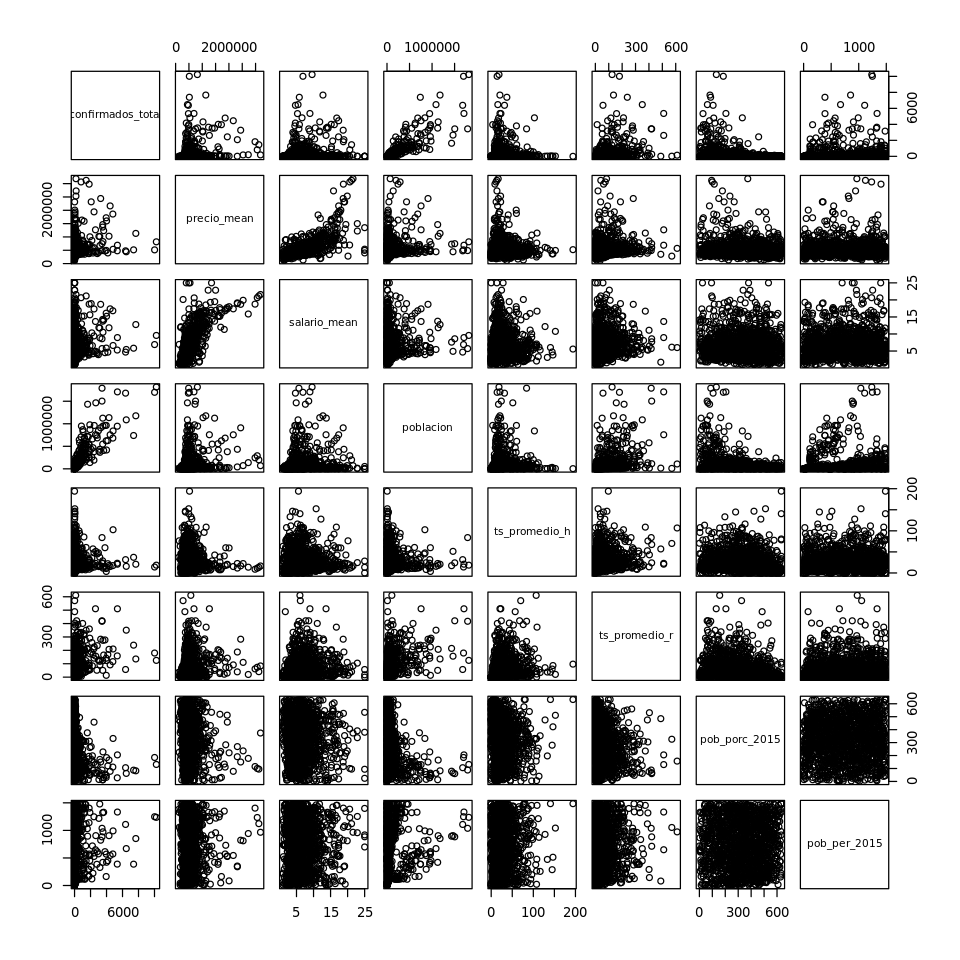

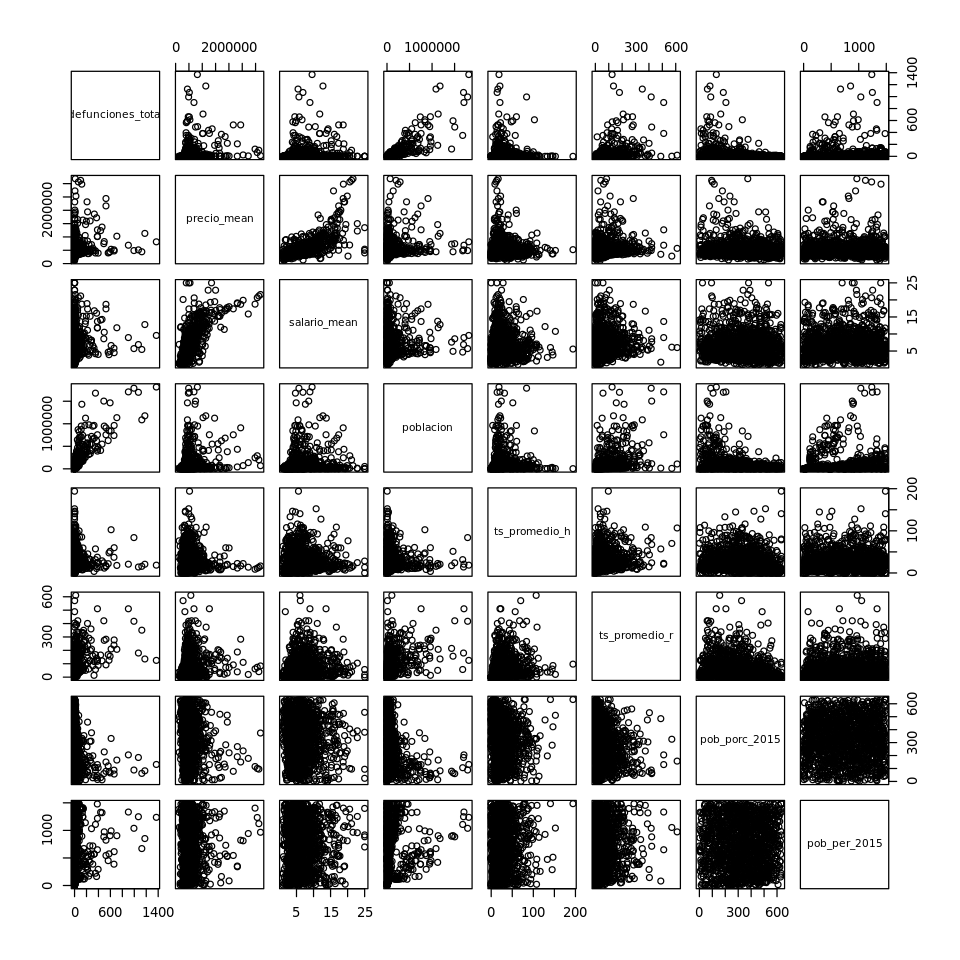

In [4]:
datos$pob_porc_2015<-as.numeric(datos$pob_porc_2015)
datos$pob_per_2015<-as.numeric(datos$pob_per_2015)
print("Matriz de Correlación del Modelo 1")
mcorr1<-datos[, c(7,3:5, 9:10,13:14)]    
cor(mcorr1,use="pairwise.complete.obs") 
pairs(mcorr1)
print("Matriz de Correlación del Modelo 2")
mcorr2<-datos[, c(8,3:5, 9:10,13:14)]
cor(mcorr2,use="pairwise.complete.obs") 
pairs(mcorr2)

De acuerdo con las matrices de correlación observamos que existe una alta correlación entre el salario diario integrado promedio y el precio de venta promedio, por lo que quitaremos alguna de las dos variables en el ajuste del modelo para evitar problemas de multicolinealidad.
 
De igual forma, en la matriz del Modelo 2, observamos alta correlación entre la población y la variable dependiente (defunciones totales). Lo anterior,podría resultar en que la población explica el número de defunciones. Se explorán los modelos creando tasas de defunciones y casos confirmados por cada cien mil habitantes.

#### Determinación de variables ralacionadas con el ingreso para el Modelo 1:
Se analiza la relación entre las siguientes variables relacionadas con el ingreso y los casos confirmados:
* Precio promedio
* Salario diario integrado promedio 
* Porcentaje de población en pobreza.

Se construyen las variables en logaritmos para homologación de escalas.

In [5]:
mcorr1$log_confirmados<-log(mcorr1$confirmados_total)
mcorr1$ts_confirmados<-(mcorr1$confirmados_total/mcorr1$poblacion)*100000
mcorr1$log_ts_confirmados<-log(mcorr1$ts_confirmados)
mcorr1$log_precio<-log(mcorr1$precio_mean)
mcorr1$log_salario<-log(mcorr1$salario_mean)
mcorr1$log_pob_per_2015<-log(mcorr1$pob_per_2015)
mcorr1$log_ts_promedio_h<-log(mcorr1$ts_promedio_h)
mcorr1$log_ts_promedio_r<-log(mcorr1$ts_promedio_r)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


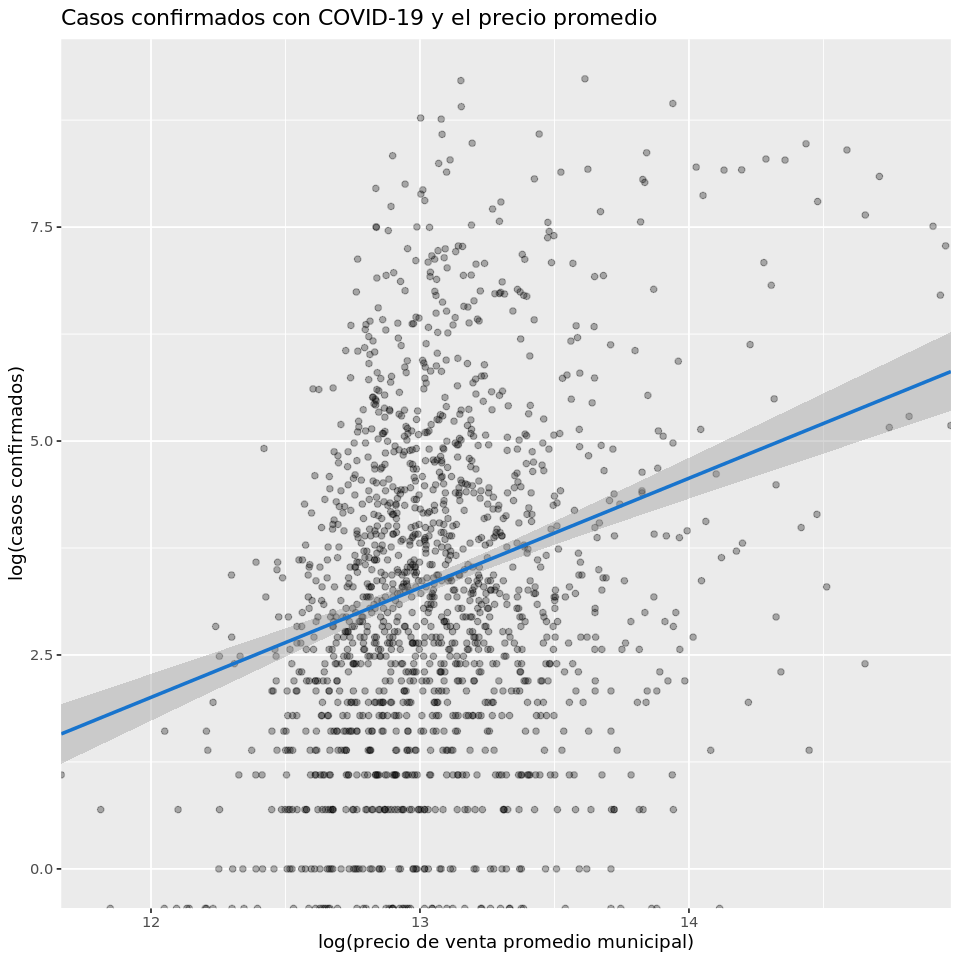

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


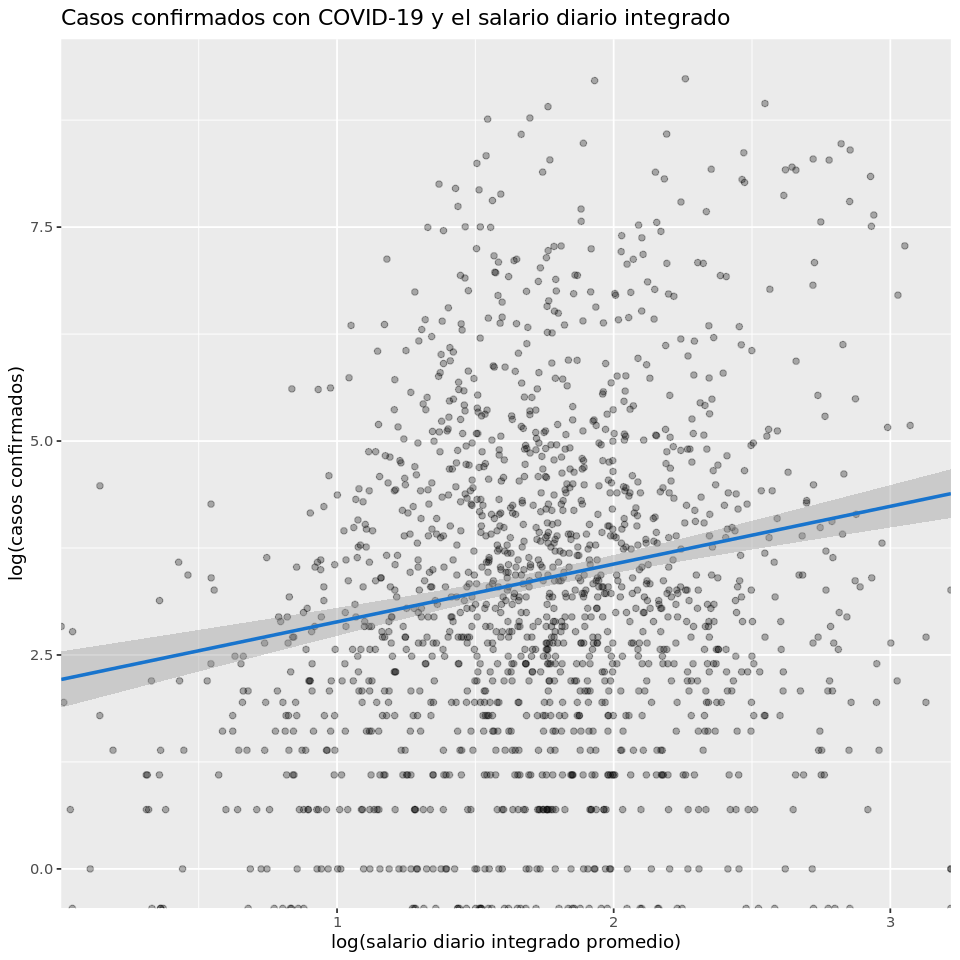

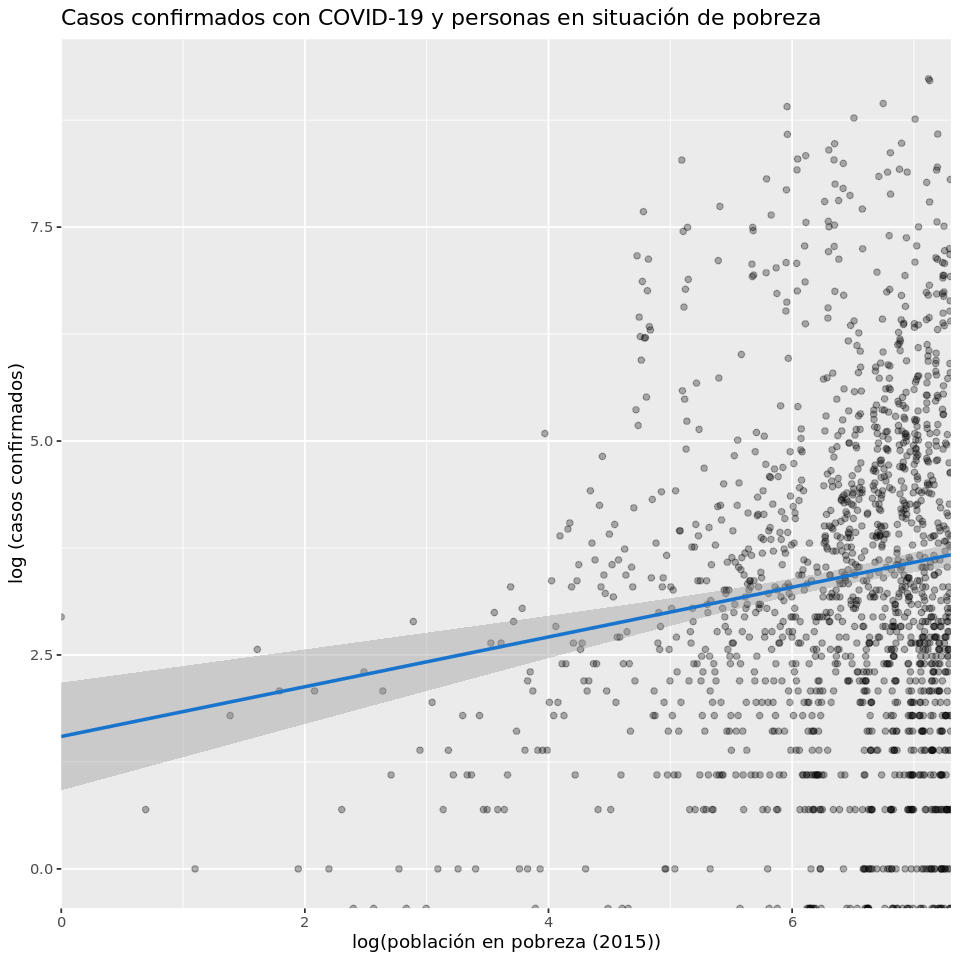

In [6]:
plot_1<-ggplot(mcorr1, aes(x=log_precio, y=log_confirmados))
plot_1 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el precio promedio", 
       x = "log(precio de venta promedio municipal)", y = "log(casos confirmados)") 

plot_2<-ggplot(mcorr1, aes(x=log_salario, y=log_confirmados))
plot_2 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y el salario diario integrado", 
       x = "log(salario diario integrado promedio)", y = "log(casos confirmados)") 

plot_3<-ggplot(mcorr1, aes(x=log_pob_per_2015, y=log_confirmados))
plot_3 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmados con COVID-19 y personas en situación de pobreza", 
       x = "log(población en pobreza (2015))", y = "log (casos confirmados)") 

De las gráficas anteriores podemos ver que el porcentaje de pobreza por municipio es consistente con nuestra hipótesis de investigación. Se observa relación positiva entre municipios con precios de venta promedio altos y casos confirmados, lo cual resulta contraintuitivo. Lo anterior puede deberse al sesgo que tienen los datos del Infonavit los cuales únicamente representan sus acreditados.

Se grafica contra el logaritmo de la tasa de casos confirmados por cada cien mil habitantes.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


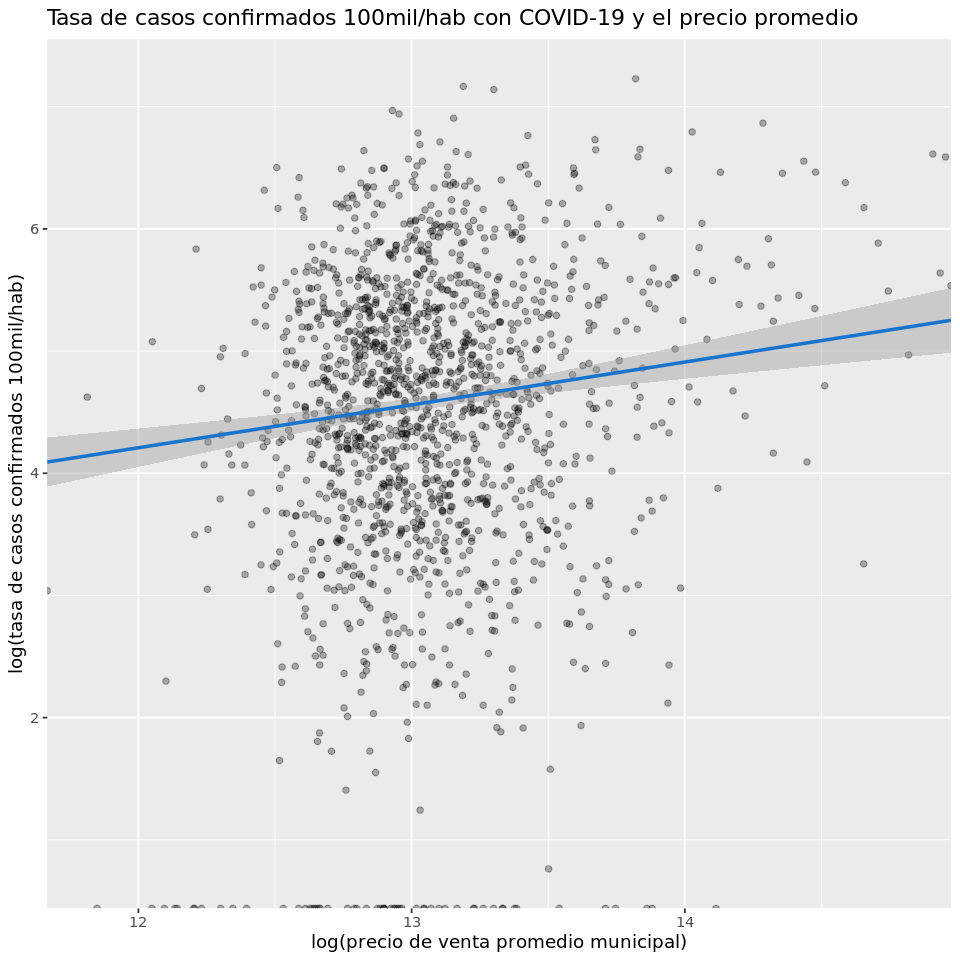

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 58 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


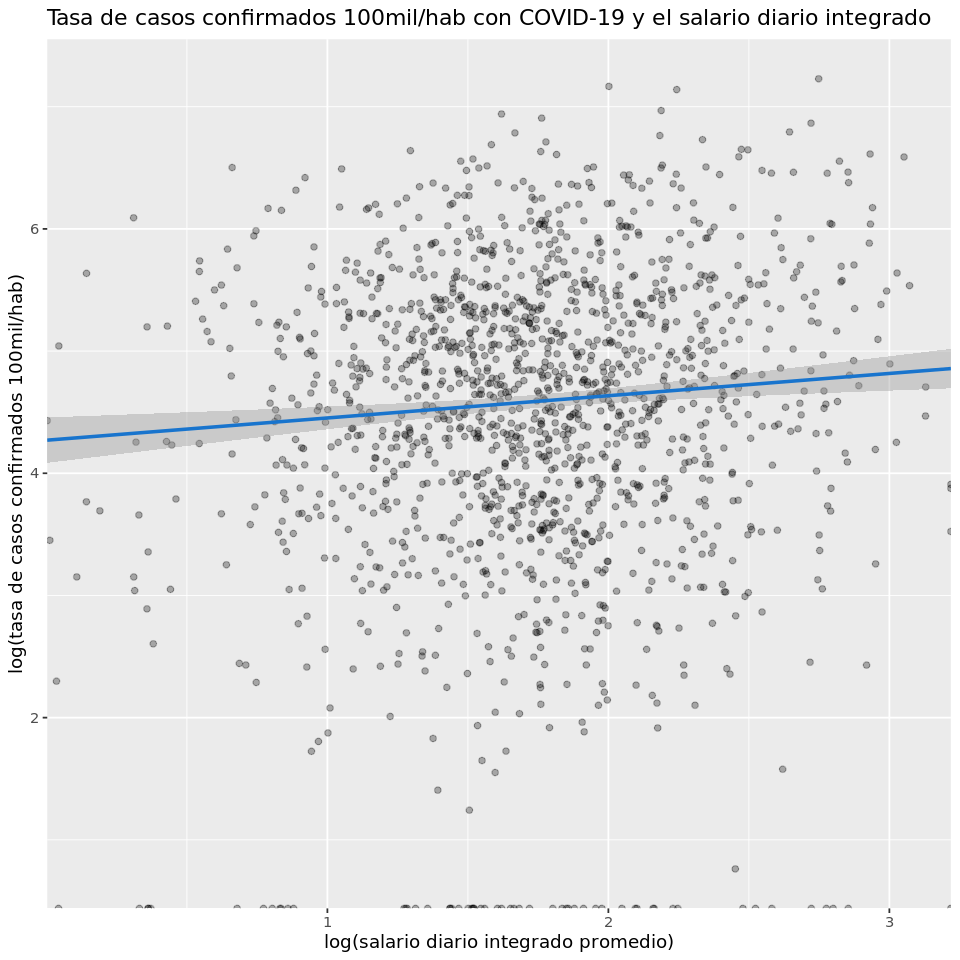

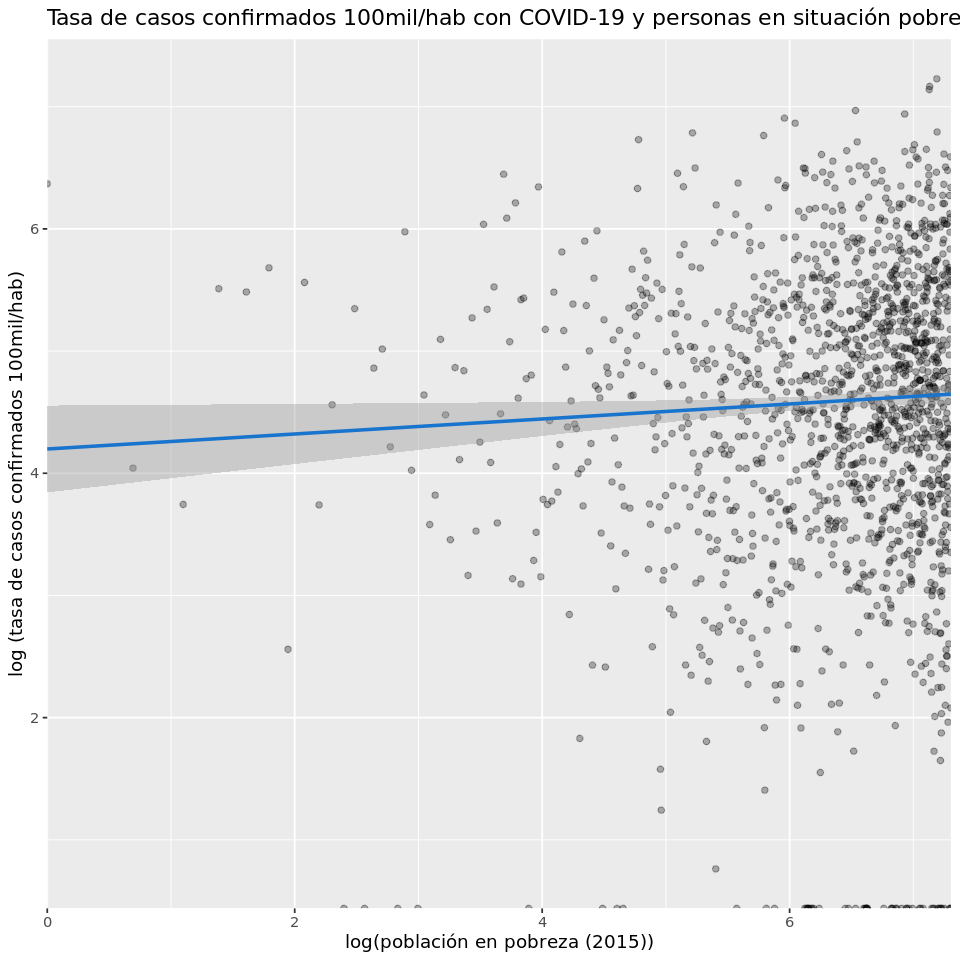

In [7]:
plot_1_1<-ggplot(mcorr1, aes(x=log_precio, y=log_ts_confirmados))
plot_1_1 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa de casos confirmados 100mil/hab con COVID-19 y el precio promedio", 
       x = "log(precio de venta promedio municipal)", y = "log(tasa de casos confirmados 100mil/hab)") 

plot_2_2<-ggplot(mcorr1, aes(x=log_salario, y=log_ts_confirmados))
plot_2_2+ 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa de casos confirmados 100mil/hab con COVID-19 y el salario diario integrado", 
       x = "log(salario diario integrado promedio)", y = "log(tasa de casos confirmados 100mil/hab)") 

plot_3_3<-ggplot(mcorr1, aes(x=log_pob_per_2015, y=log_ts_confirmados))
plot_3_3+ 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa de casos confirmados 100mil/hab con COVID-19 y personas en situación pobreza", 
       x = "log(población en pobreza (2015))", y = "log (tasa de casos confirmados 100mil/hab)") 

$Conclusión:$
De las gráficas anteriores concluimos que podemos incorporar al ajuste del modelo el porcentaje de población en pobreza. Mediante el análisis con las variables del Infonavit en escala logarítmica y el logaritmo de tasa de casos confirmados por 100mil/hab, se concluye que las relaciones se mantienen en escala logarítmica. Con base en lo anteriro, el precio promedio de venta no se incluirá en el modelo, dado que lo  anterior puede ser resultado de que la información de precios es representativa únicamente de la población de acreditados de Infonavit.

#### Variables de seguridad para el Modelo 1:
Se analiza la relación entre las variables de seguridad construidas y su relación con los casos confirmados:

* Tasa promedio de 2015-mayo 2020 de homicidios por cada cien mil habiantes (*ts_promedio_h*).
* Tasa promedio de 2015-mayo 2020 de robo a vehículo automotor por cada cien mil habiantes (*ts_promedio_r*).

**Tasa promedio de 2015-mayo 2020 de homicidios por cada cien mil habiantes (*ts_promedio_h*)**

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


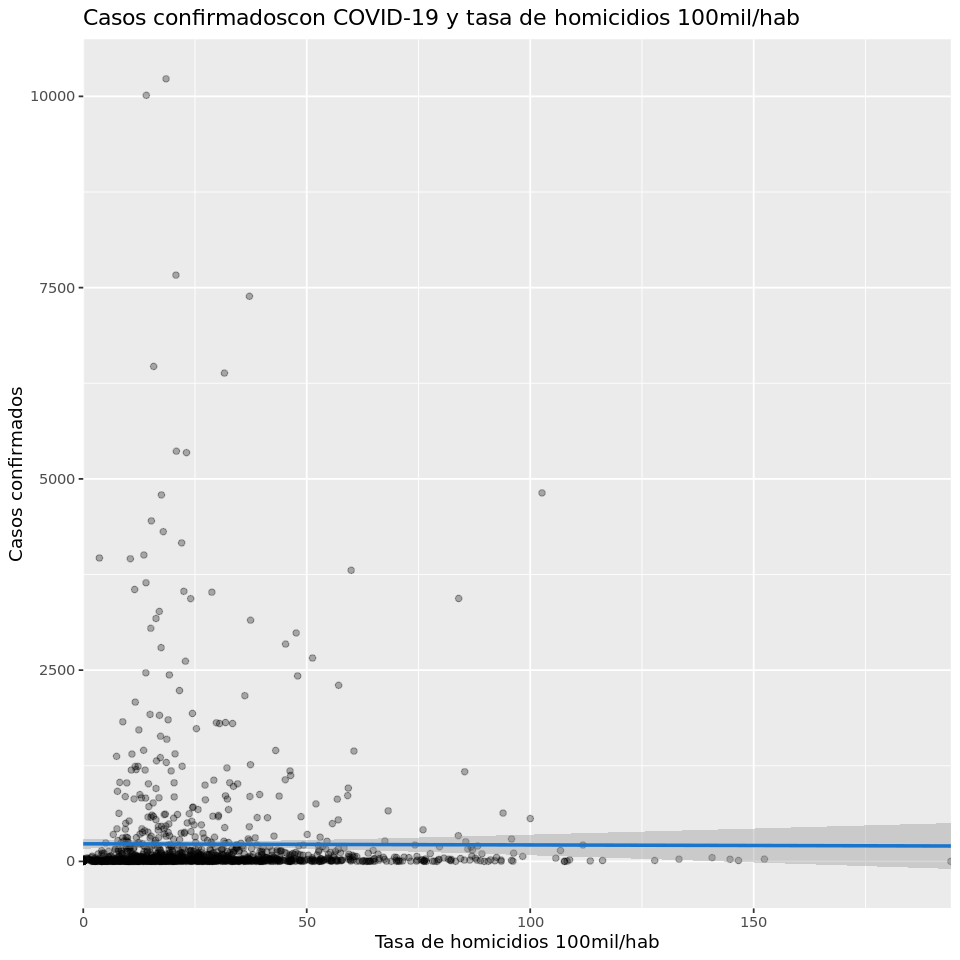

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 161 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


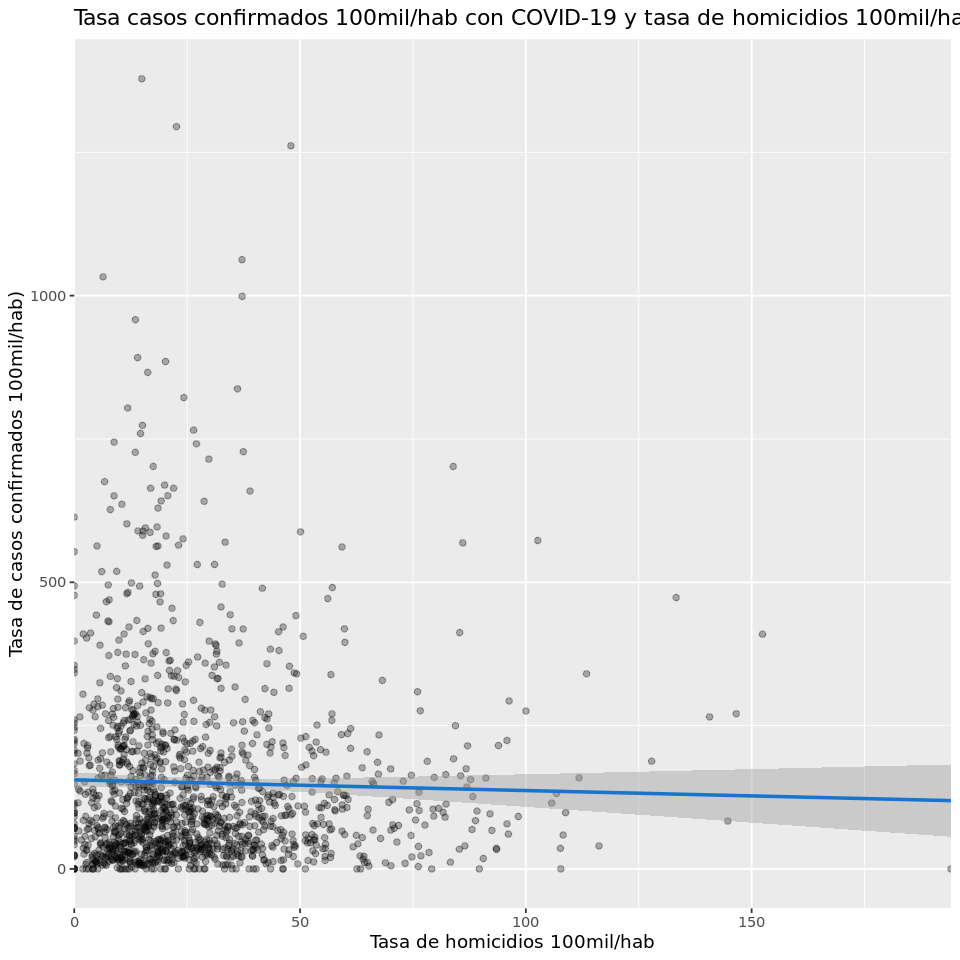

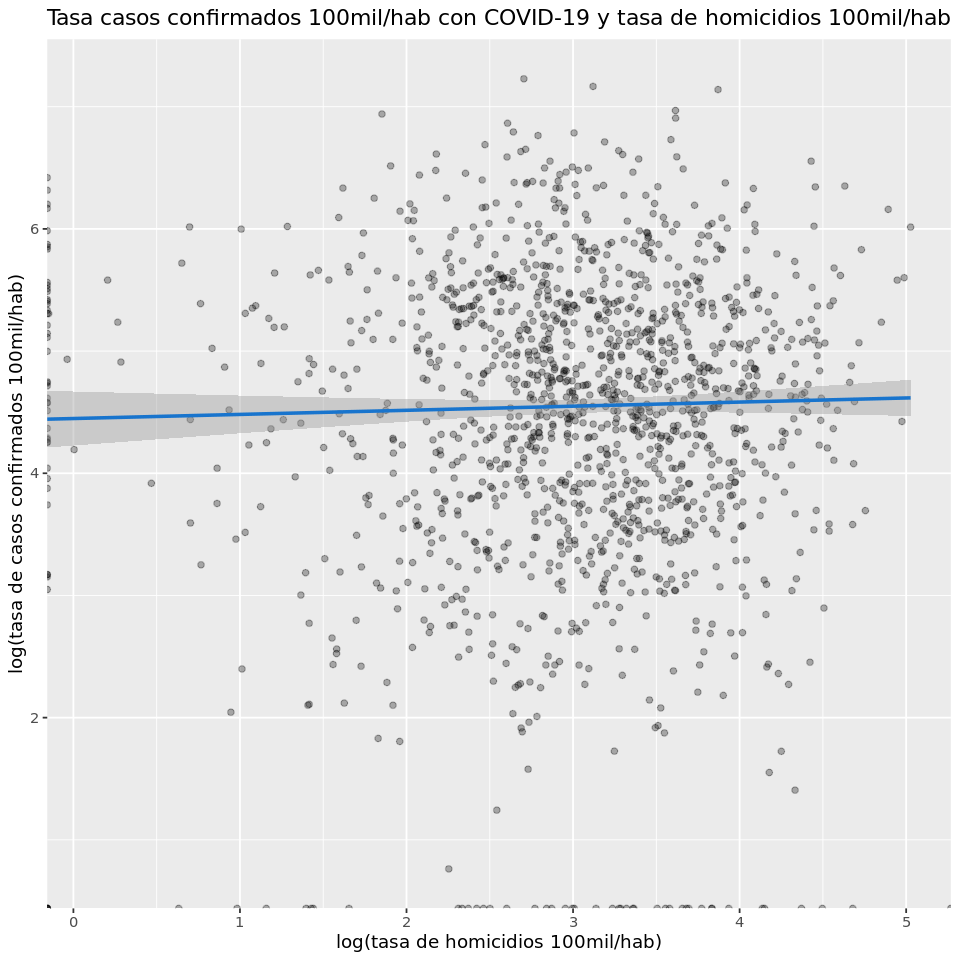

In [8]:
graf_1<-ggplot(mcorr1, aes(x=ts_promedio_h, y=confirmados_total))
graf_1 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmadoscon COVID-19 y tasa de homicidios 100mil/hab", 
       x = "Tasa de homicidios 100mil/hab", y = "Casos confirmados") 

graf_2<-ggplot(mcorr1, aes(x=ts_promedio_h, y=ts_confirmados))
graf_2 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa casos confirmados 100mil/hab con COVID-19 y tasa de homicidios 100mil/hab", 
       x = "Tasa de homicidios 100mil/hab", y = "Tasa de casos confirmados 100mil/hab)") 


graf_3<-ggplot(mcorr1, aes(x=log_ts_promedio_h, y=log_ts_confirmados))
graf_3 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
 labs(title = "Tasa casos confirmados 100mil/hab con COVID-19 y tasa de homicidios 100mil/hab", 
       x = "log(tasa de homicidios 100mil/hab)", y = "log(tasa de casos confirmados 100mil/hab)") 

$Conclusión:$ Mediante el análsis de escala logarítmica no se observa una relación entre la tasa de homicidios promedio y la tasa de casos confirmados con SARS-COVID-19.

**Tasa promedio de 2015-mayo 2020 de robo a vehículo automotor por cada cien mil habiantes (*ts_promedio_r*).**

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


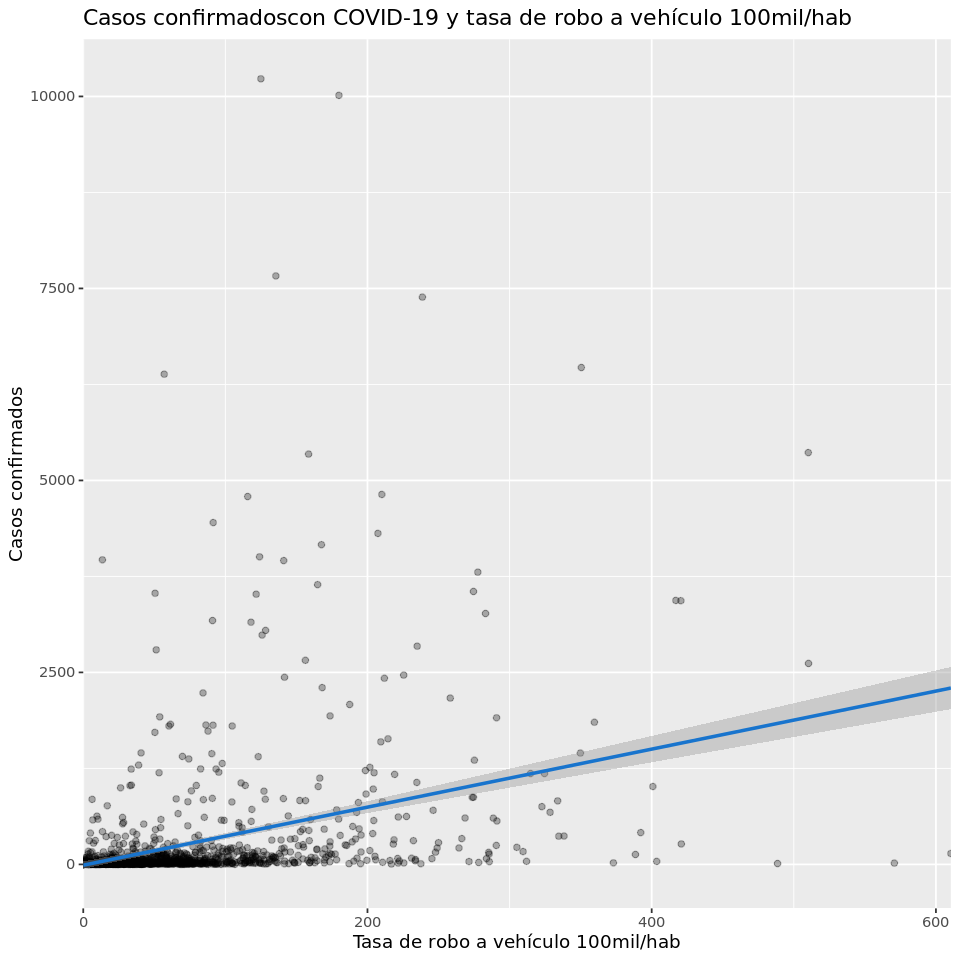

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 216 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


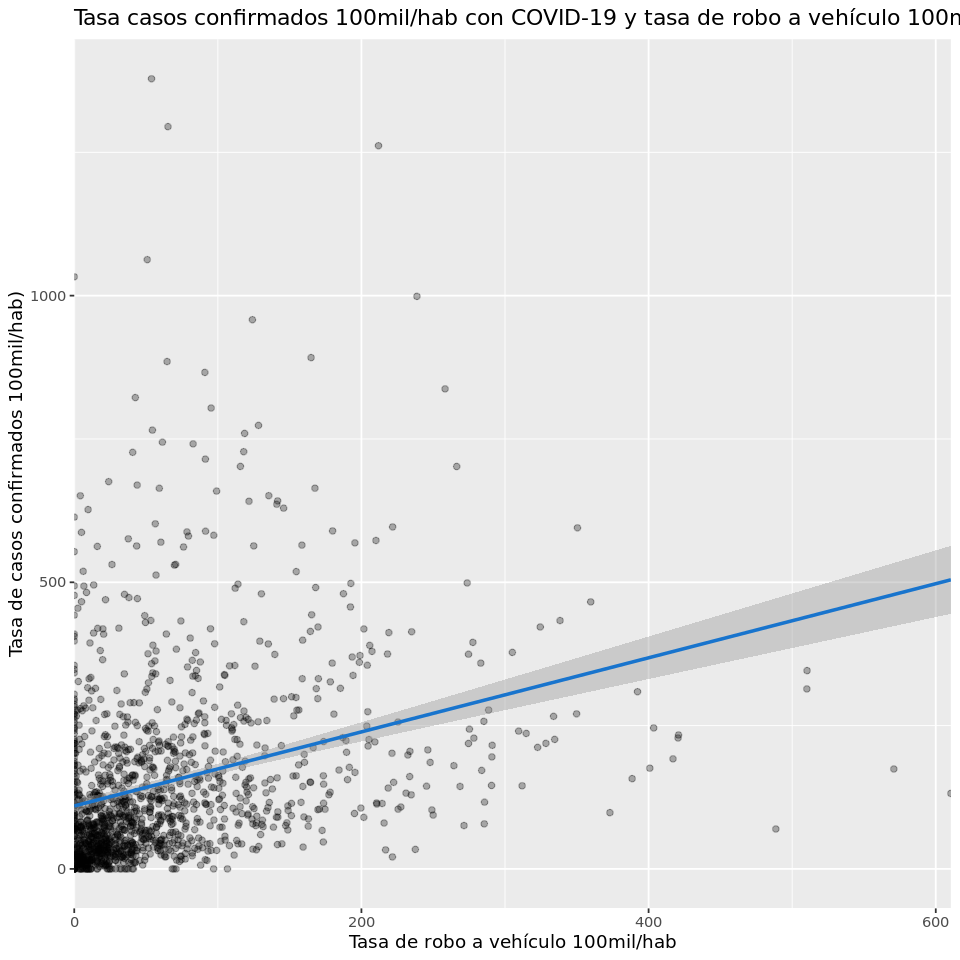

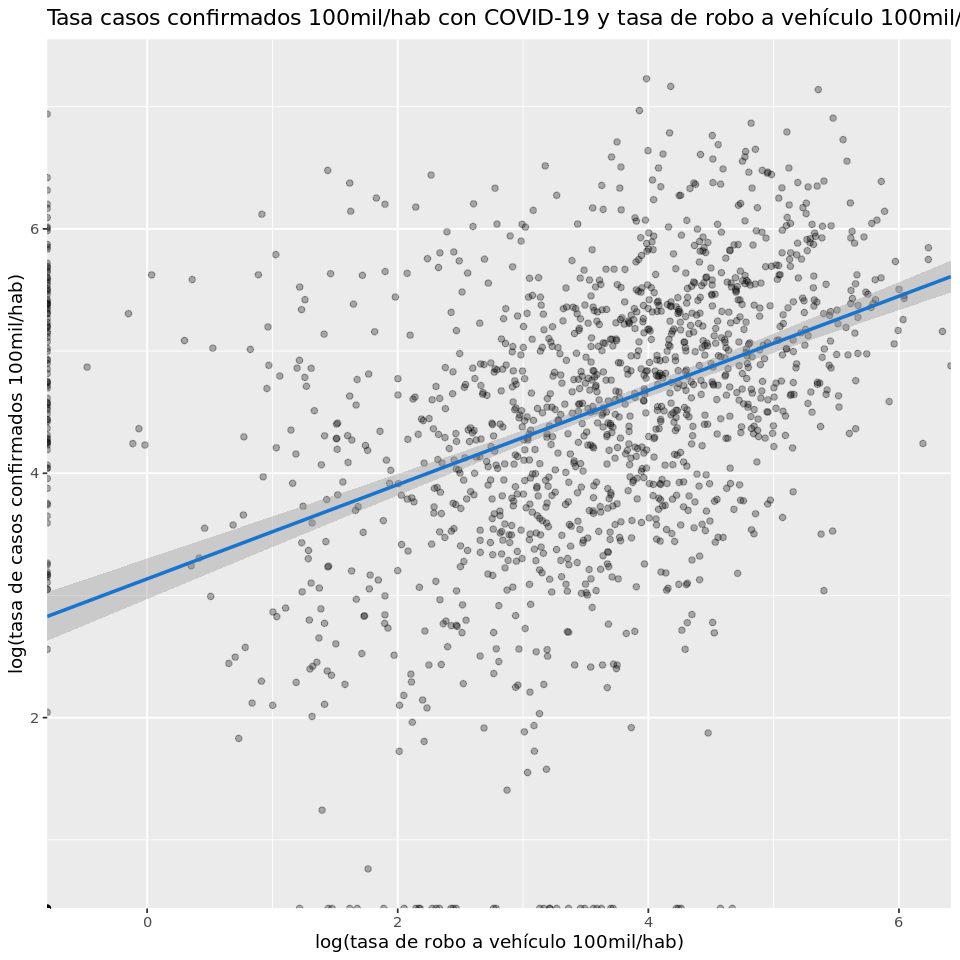

In [9]:
graf_1_r<-ggplot(mcorr1, aes(x=ts_promedio_r, y=confirmados_total))
graf_1_r + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Casos confirmadoscon COVID-19 y tasa de robo a vehículo 100mil/hab", 
       x = "Tasa de robo a vehículo 100mil/hab", y = "Casos confirmados") 

graf_2_r<-ggplot(mcorr1, aes(x=ts_promedio_r, y=ts_confirmados))
graf_2_r + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa casos confirmados 100mil/hab con COVID-19 y tasa de robo a vehículo 100mil/hab", 
       x = "Tasa de robo a vehículo 100mil/hab", y = "Tasa de casos confirmados 100mil/hab)") 


graf_3_r<-ggplot(mcorr1, aes(x=log_ts_promedio_r, y=log_ts_confirmados))
graf_3_r + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
 labs(title = "Tasa casos confirmados 100mil/hab con COVID-19 y tasa de robo a vehículo 100mil/hab", 
       x = "log(tasa de robo a vehículo 100mil/hab)", y = "log(tasa de casos confirmados 100mil/hab)") 

$Conclusión:$ Mediante el análsis de escala logarítmica se observa una relación positiva entre la tasa de robo a vehículo y la tasa de casos confirmados con SARS-COVID-19.

#### Determinación de Variables de Ingreso para el Modelo 2:

Se analiza la relación entre las siguientes variables relacionadas con el ingreso y las defunciones:
* Precio promedio
* Salario diario integrado promedio 
* Porcentaje de población en pobreza.

Se construyen las variables en logaritmos para homologación de escalas.

In [10]:
mcorr2$log_defunciones_total<-log(mcorr2$defunciones_total)
mcorr2$ts_defunciones<-(mcorr2$defunciones_total/mcorr2$poblacion)*100000
mcorr2$log_ts_defunciones<-log(mcorr2$ts_defunciones)
mcorr2$log_precio<-log(mcorr2$precio_mean)
mcorr2$log_salario<-log(mcorr2$salario_mean)
mcorr2$log_pob_per_2015<-log(mcorr2$pob_per_2015)
mcorr2$log_ts_promedio_h<-log(mcorr2$ts_promedio_h)
mcorr2$log_ts_promedio_r<-log(mcorr2$ts_promedio_r)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 337 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 337 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


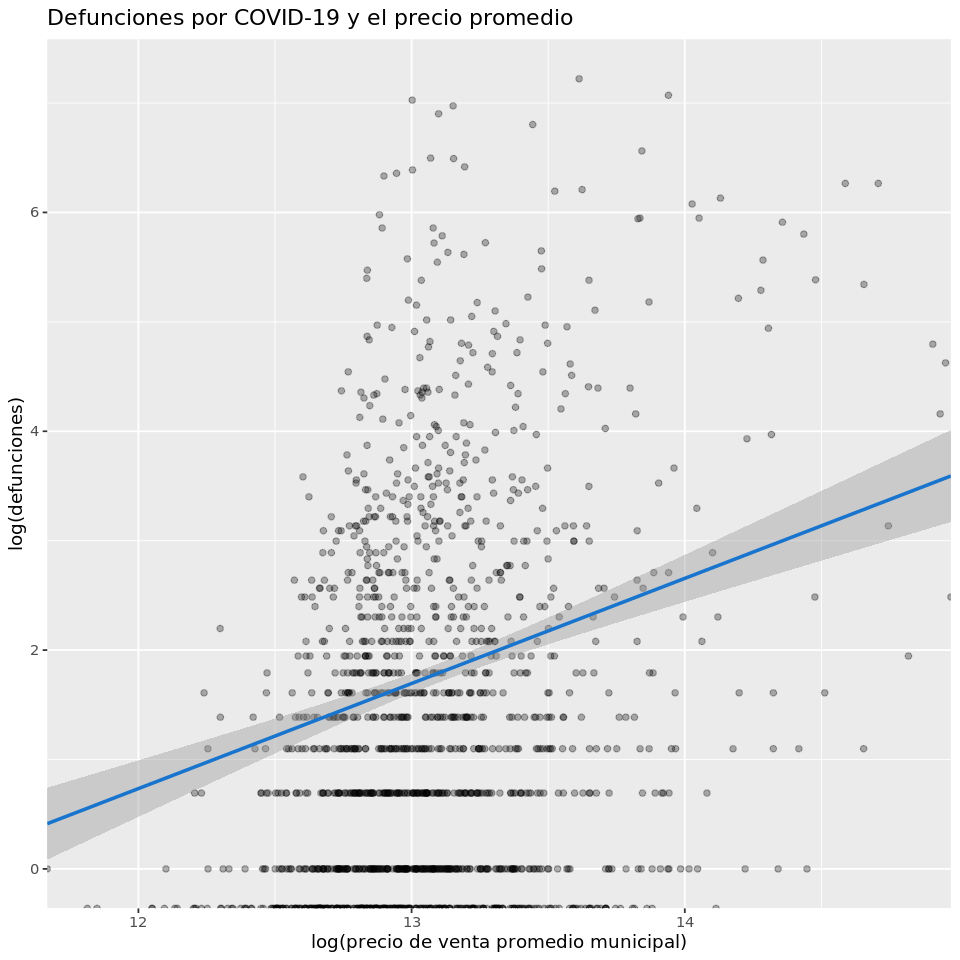

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 337 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


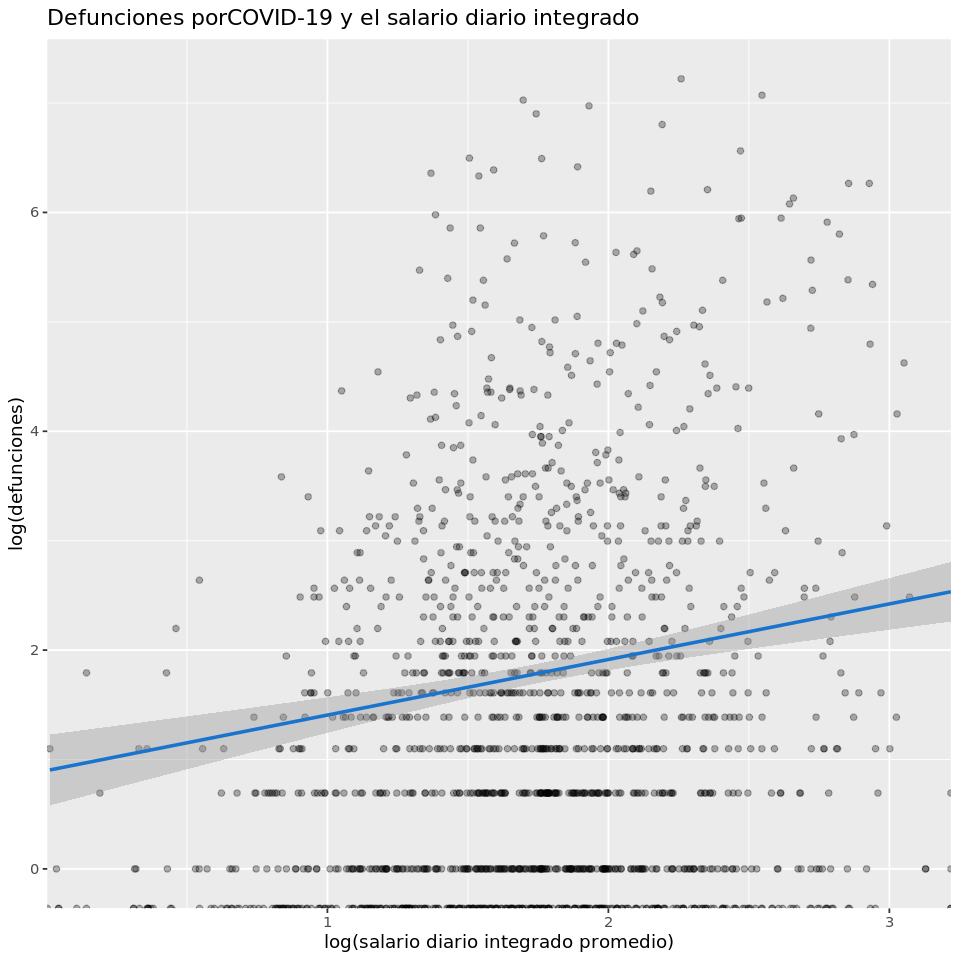

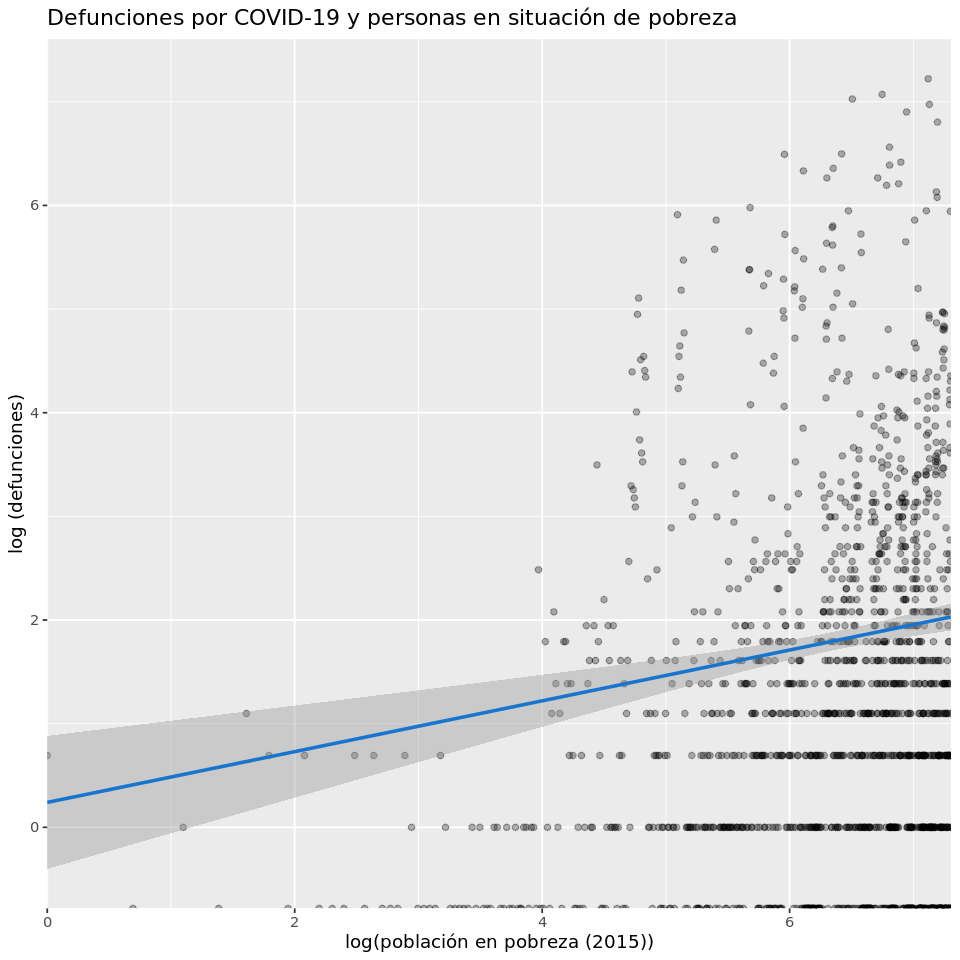

In [11]:
plot_4<-ggplot(mcorr2, aes(x=log_precio, y=log_defunciones_total))
plot_4 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones por COVID-19 y el precio promedio", 
       x = "log(precio de venta promedio municipal)", y = "log(defunciones)") 

plot_5<-ggplot(mcorr2, aes(x=log_salario, y=log_defunciones_total))
plot_5 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones porCOVID-19 y el salario diario integrado", 
       x = "log(salario diario integrado promedio)", y = "log(defunciones)") 

plot_6<-ggplot(mcorr2, aes(x=log_pob_per_2015, y=log_defunciones_total))
plot_6 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones por COVID-19 y personas en situación de pobreza", 
       x = "log(población en pobreza (2015))", y = "log (defunciones)") 

$Conclusión:$
Las gráficas anteriores mantienen los resultados del Modelo 1: se incorporararán al ajuste del modelo la población de personas en situación de pobreza. Mediante el análisis con las variables en escala logarítmica las relaciones se mantienen. El precio de venta promedio tiene una relación contraintuitiva con las defunciones, por lo que no se incluirá en el modelo.  Lo anterior puede ser resultado de que la información de precios es representativa únicamente de la población de acreditados de Infonavit.

#### Variables de seguridad para el Modelo 2:
Se analiza la relación entre las variables de seguridad construidas y su relación con las defunciones por COVID-19:

* Tasa promedio de 2015-mayo 2020 de homicidios por cada cien mil habiantes (*ts_promedio_h*).
* Tasa promedio de 2015-mayo 2020 de robo a vehículo automotor por cada cien mil habiantes (*ts_promedio_r*).

**Tasa promedio de 2015-mayo 2020 de homicidios por cada cien mil habiantes (*ts_promedio_h*)**

In [12]:
names(mcorr2)

[1] "defunciones_total"     "precio_mean"           "salario_mean"         
 [4] "poblacion"             "ts_promedio_h"         "ts_promedio_r"        
 [7] "pob_porc_2015"         "pob_per_2015"          "log_defunciones_total"
[10] "ts_defunciones"        "log_ts_defunciones"    "log_precio"           
[13] "log_salario"           "log_pob_per_2015"      "log_ts_promedio_h"    
[16] "log_ts_promedio_r"

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


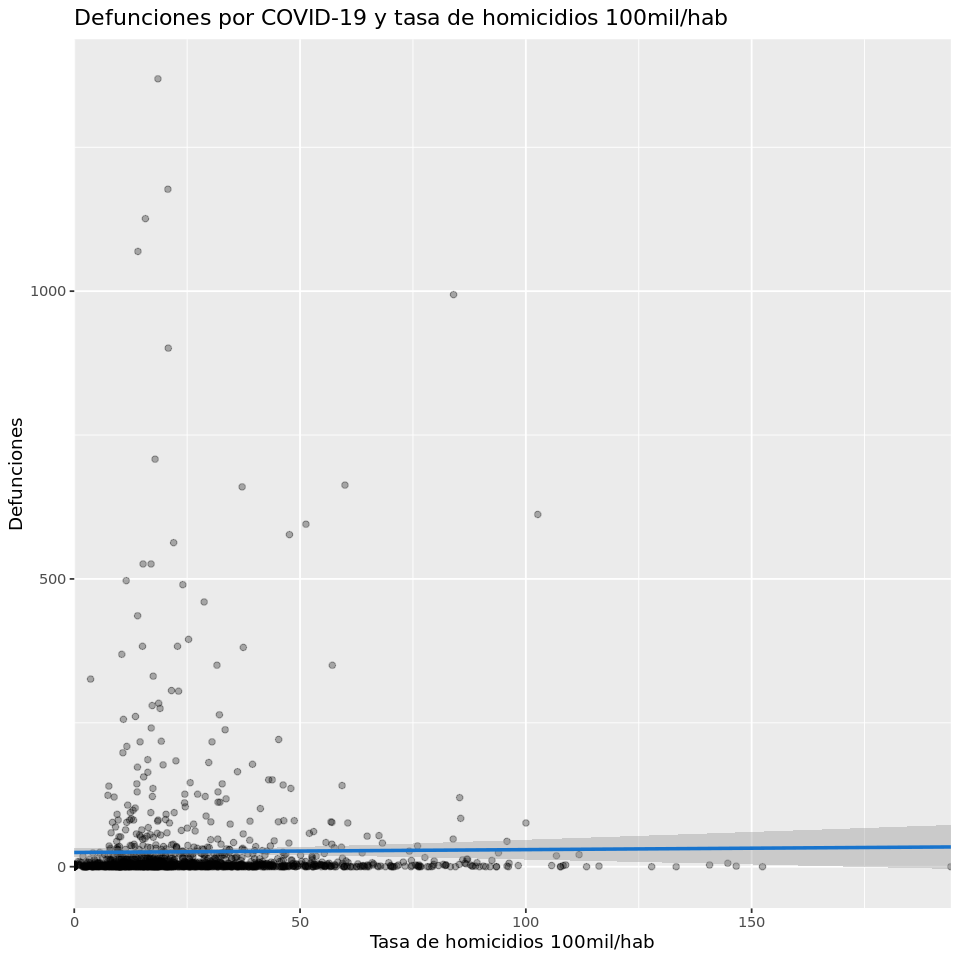

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 409 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


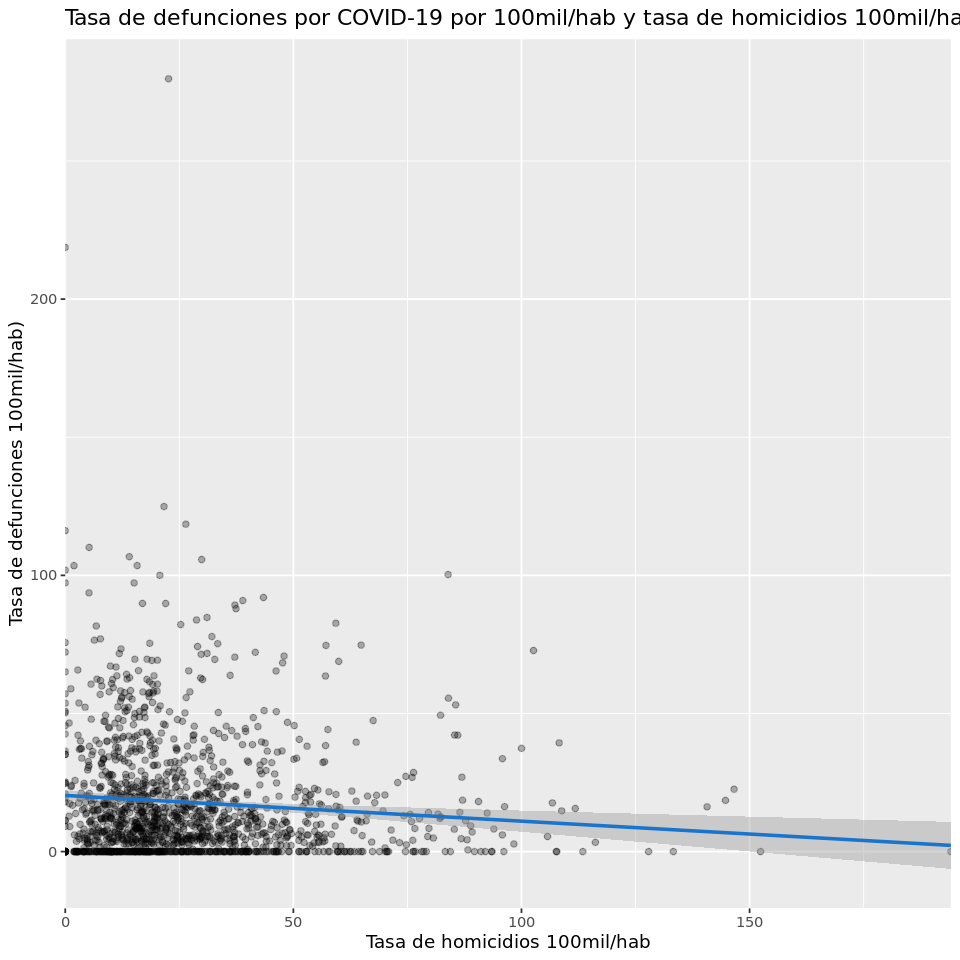

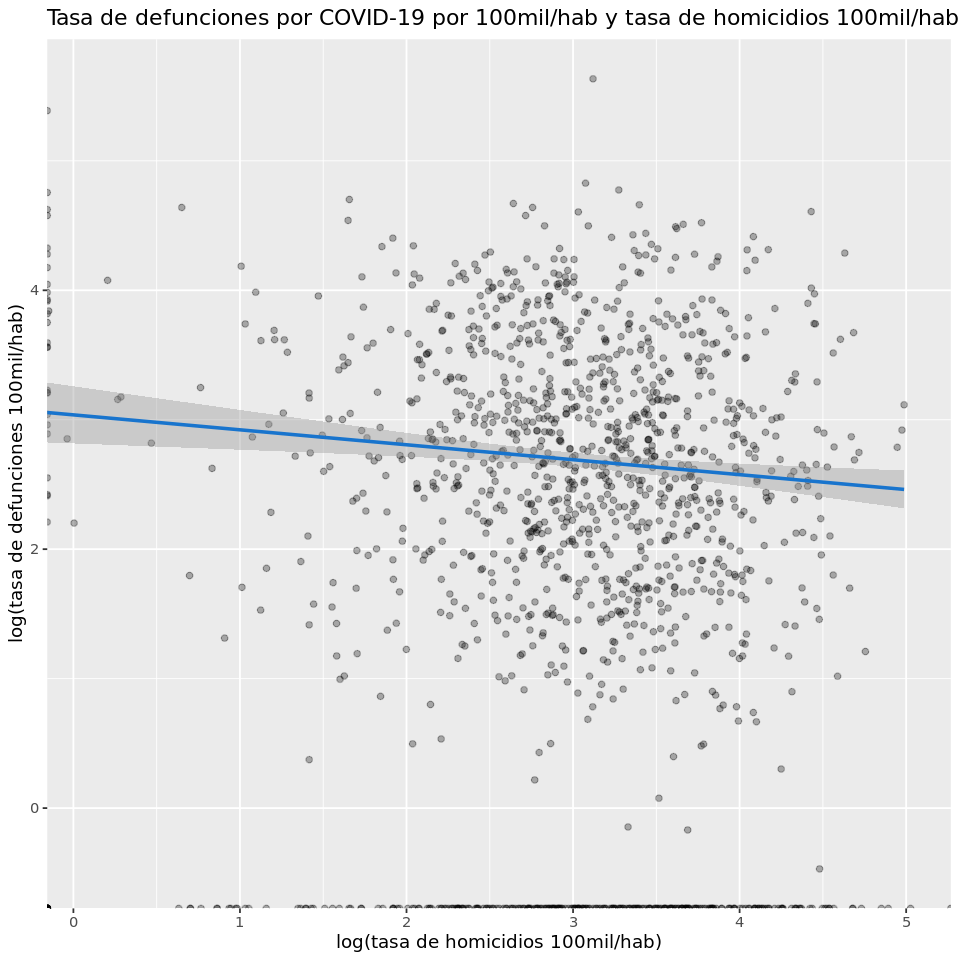

In [13]:
graf_4<-ggplot(mcorr2, aes(x=ts_promedio_h, y=defunciones_total))
graf_4 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones por COVID-19 y tasa de homicidios 100mil/hab", 
       x = "Tasa de homicidios 100mil/hab", y = "Defunciones") 

graf_5<-ggplot(mcorr2, aes(x=ts_promedio_h, y=ts_defunciones))
graf_5 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa de defunciones por COVID-19 por 100mil/hab y tasa de homicidios 100mil/hab", 
       x = "Tasa de homicidios 100mil/hab", y = "Tasa de defunciones 100mil/hab)") 


graf_6<-ggplot(mcorr2, aes(x=log_ts_promedio_h, y=log_ts_defunciones))
graf_6 + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa de defunciones por COVID-19 por 100mil/hab y tasa de homicidios 100mil/hab", 
       x = "log(tasa de homicidios 100mil/hab)", y = "log(tasa de defunciones 100mil/hab)") 

$Conclusión:$ Mediante el análsis de escala logarítmica no se observa una relación entre la tasa de homicidios promedio y la tasa de defunciones por COVID-19.

**Tasa promedio de 2015-mayo 2020 de robo a vehículo automotor por cada cien mil habiantes (*ts_promedio_r*).**

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 73 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


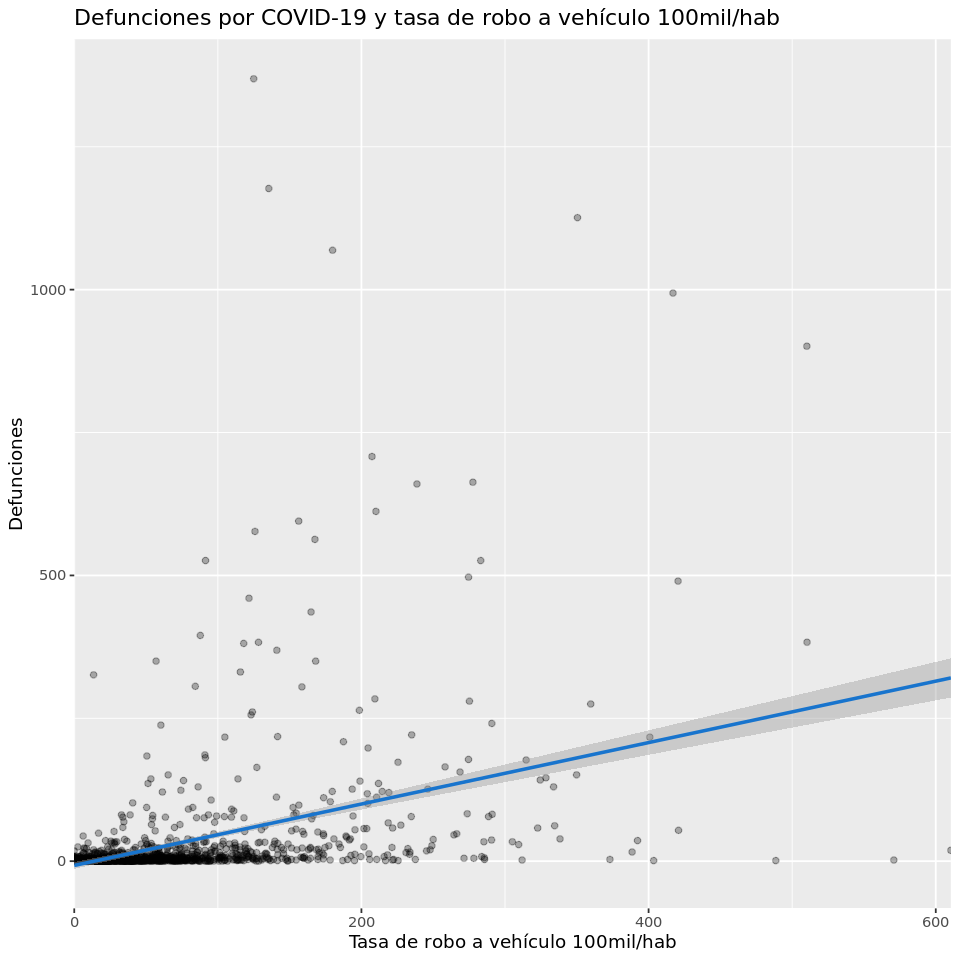

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 438 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 73 rows containing missing values (geom_point).”


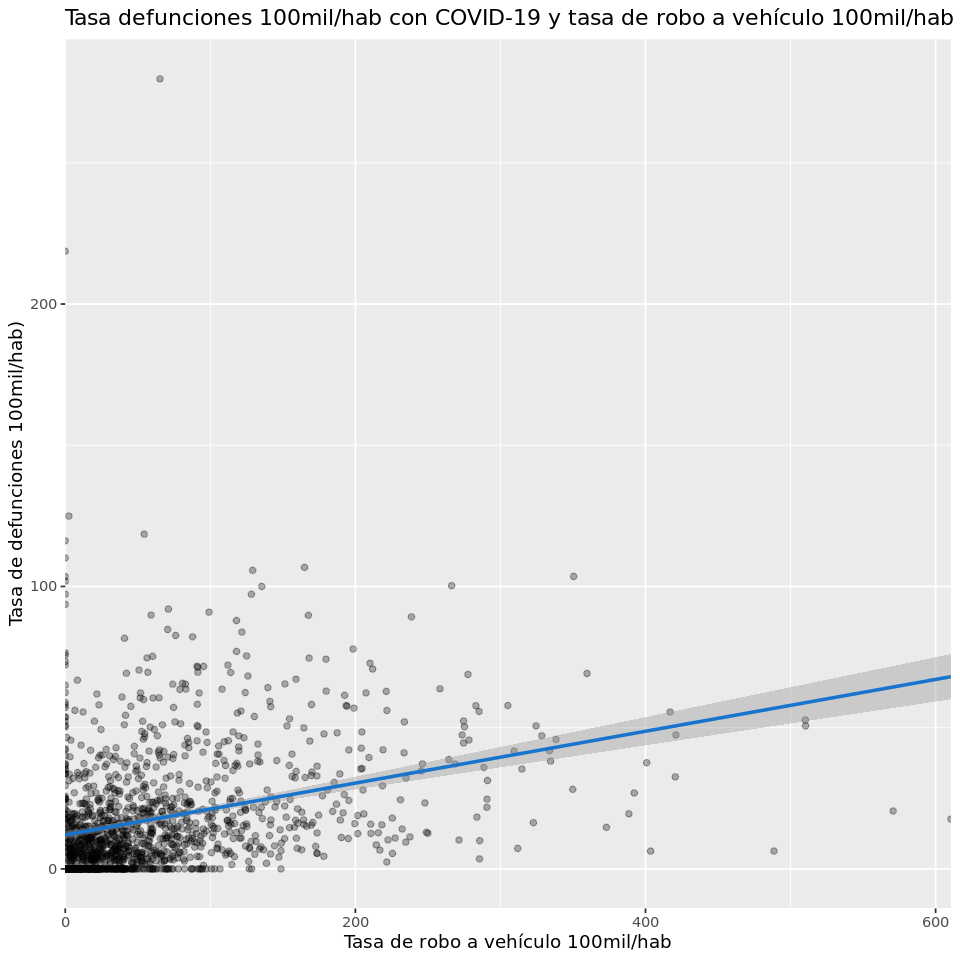

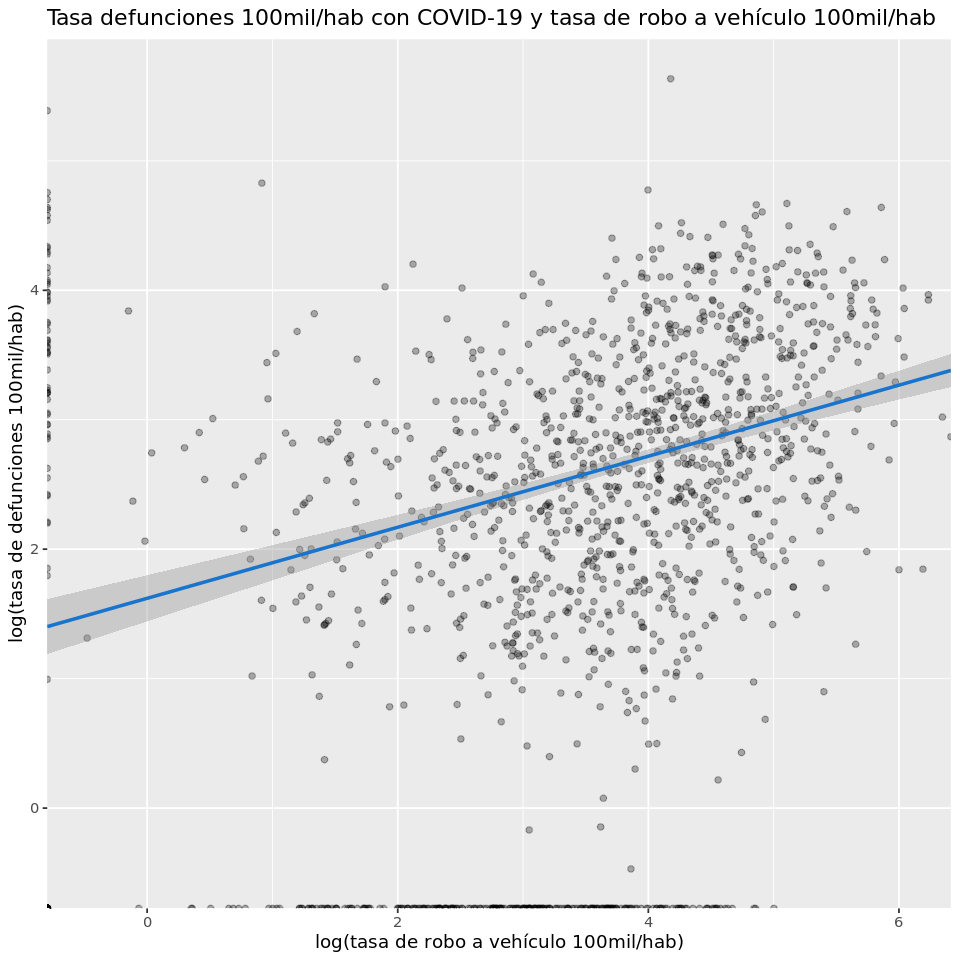

In [14]:
graf_4_r<-ggplot(mcorr2, aes(x=ts_promedio_r, y=defunciones_total))
graf_4_r + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Defunciones por COVID-19 y tasa de robo a vehículo 100mil/hab", 
       x = "Tasa de robo a vehículo 100mil/hab", y = "Defunciones") 

graf_5_r<-ggplot(mcorr2, aes(x=ts_promedio_r, y=ts_defunciones))
graf_5_r + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
  labs(title = "Tasa defunciones 100mil/hab con COVID-19 y tasa de robo a vehículo 100mil/hab", 
       x = "Tasa de robo a vehículo 100mil/hab", y = "Tasa de defunciones 100mil/hab)") 


graf_6_r<-ggplot(mcorr2, aes(x=log_ts_promedio_r, y=log_ts_defunciones))
graf_6_r + 
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "dodgerblue3") +
  scale_x_continuous(expand = c(0,0)) +
 labs(title = "Tasa defunciones 100mil/hab con COVID-19 y tasa de robo a vehículo 100mil/hab", 
       x = "log(tasa de robo a vehículo 100mil/hab)", y = "log(tasa de defunciones 100mil/hab)") 

$Conclusión:$ Mediante el análsis de escala logarítmica se observa una relación positiva entre la tasa de robo a vehículo y la tasa de defunciones por SARS-COVID-19.

## $$ Modelo\ 1:\ Casos\ Confirmados $$ 

Se ajusta el siguiente modelo de regresión multivariada:

**1.1. Modelo con casos confirmados:**

In [20]:
m1<-lm(confirmados_total~ pob_per_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr1)
summary(m1)


Call:
lm(formula = confirmados_total ~ pob_per_2015 + ts_promedio_h + 
    ts_promedio_r, data = mcorr1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2107.7  -185.0   -63.1    -2.8  9709.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   36.34485   45.15643   0.805 0.421030    
pob_per_2015   0.03609    0.04428   0.815 0.415202    
ts_promedio_h -3.11381    0.86372  -3.605 0.000323 ***
ts_promedio_r  3.97453    0.25860  15.369  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 717.4 on 1440 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.1423,	Adjusted R-squared:  0.1405 
F-statistic: 79.61 on 3 and 1440 DF,  p-value: < 2.2e-16


**1.2. Modelo con la tasa de casos confirmados por 100mil/hab:**

In [21]:
ts_m1<-lm(ts_confirmados~ pob_per_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr1)
summary(ts_m1)


Call:
lm(formula = ts_confirmados ~ pob_per_2015 + ts_promedio_h + 
    ts_promedio_r, data = mcorr1)

Residuals:
    Min      1Q  Median      3Q     Max 
-344.10  -94.71  -46.88   44.77 1211.15 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   108.743197   9.736241  11.169  < 2e-16 ***
pob_per_2015    0.024202   0.009548   2.535 0.011360 *  
ts_promedio_h  -0.703489   0.186229  -3.778 0.000165 ***
ts_promedio_r   0.685603   0.055758  12.296  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 154.7 on 1440 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.1013,	Adjusted R-squared:  0.09941 
F-statistic:  54.1 on 3 and 1440 DF,  p-value: < 2.2e-16


Se revisan los datos para realizar el modelo logarítmico:

In [22]:
mcorr1$log_ts_promedio_h<-log(mcorr1$ts_promedio_h)
mcorr1$log_ts_promedio_r<-log(mcorr1$ts_promedio_r)
summary(mcorr1$log_ts_confirmados)
summary(mcorr1$log_confirmados)
summary(mcorr1$log_ts_promedio_h)
summary(mcorr1$log_ts_promedio_r)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -Inf   3.766   4.613    -Inf   5.325   7.229       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -Inf   1.946   3.091    -Inf   4.434   9.233       1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -Inf   2.520   3.061    -Inf   3.589   5.268      73 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -Inf   2.609   3.623    -Inf   4.409   6.414      73 

**1.3. Modelo con el logarítmo de la tasa de casos confirmados por 100mil/hab:**

In [31]:
log_ts_mcorr1<-filter(mcorr1, log_ts_confirmados>0 & log_ts_promedio_h>0 & log_ts_promedio_r>0)
log_ts_m1<-lm(log_ts_confirmados ~ log_pob_per_2015+ log_ts_promedio_h +log_ts_promedio_r,
            data = log_ts_mcorr1)
summary(log_ts_m1)


Call:
lm(formula = log_ts_confirmados ~ log_pob_per_2015 + log_ts_promedio_h + 
    log_ts_promedio_r, data = log_ts_mcorr1)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.04437 -0.59951  0.03916  0.61230  2.76392 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.10931    0.22184  14.016  < 2e-16 ***
log_pob_per_2015   0.04162    0.02944   1.414  0.15770    
log_ts_promedio_h -0.12098    0.03788  -3.193  0.00144 ** 
log_ts_promedio_r  0.42236    0.02356  17.926  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9431 on 1290 degrees of freedom
Multiple R-squared:  0.2062,	Adjusted R-squared:  0.2043 
F-statistic: 111.7 on 3 and 1290 DF,  p-value: < 2.2e-16


**1.4. Modelo con el logarítmo de los casos confirmados por 100mil/hab:**

In [36]:
log_mcorr1<-filter(mcorr1, log_confirmados>0 & log_ts_promedio_h>0 & log_ts_promedio_r>0)
log_m1<-lm(log_confirmados ~ log_pob_per_2015+ log_ts_promedio_h +log_ts_promedio_r,
            data = log_mcorr1)
summary(log_m1)


Call:
lm(formula = log_confirmados ~ log_pob_per_2015 + log_ts_promedio_h + 
    log_ts_promedio_r, data = log_mcorr1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9410 -1.1049 -0.0984  0.9440  5.0643 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.12910    0.37732   0.342 0.732291    
log_pob_per_2015   0.19154    0.05074   3.775 0.000168 ***
log_ts_promedio_h -0.28826    0.06346  -4.543  6.1e-06 ***
log_ts_promedio_r  0.86422    0.03993  21.644  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.546 on 1250 degrees of freedom
Multiple R-squared:  0.2894,	Adjusted R-squared:  0.2877 
F-statistic: 169.7 on 3 and 1250 DF,  p-value: < 2.2e-16


## $$ Modelo\ 2:\ Defunciones $$ 

Se ajusta el siguiente modelo de regresión multivariada:

**2.1. Modelo con defunciones:**

In [27]:
m2<-lm(defunciones_total~ pob_porc_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr2)

In [28]:
summary(m2)


Call:
lm(formula = defunciones_total ~ pob_porc_2015 + ts_promedio_h + 
    ts_promedio_r, data = mcorr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.88  -26.42   -6.20   11.65 1285.92 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.30532    6.91116   6.121 1.19e-09 ***
pob_porc_2015 -0.11040    0.01528  -7.226 8.06e-13 ***
ts_promedio_h -0.42605    0.10640  -4.004 6.54e-05 ***
ts_promedio_r  0.50514    0.03269  15.454  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 88.13 on 1440 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.2027,	Adjusted R-squared:  0.2011 
F-statistic: 122.1 on 3 and 1440 DF,  p-value: < 2.2e-16


**2.2. Modelo con la tasa de casos confirmados por 100mil/hab:**

In [29]:
ts_m2<-lm(ts_defunciones~ pob_porc_2015+ ts_promedio_h +ts_promedio_r ,
            data = mcorr2)
summary(ts_m2)


Call:
lm(formula = ts_defunciones ~ pob_porc_2015 + ts_promedio_h + 
    ts_promedio_r, data = mcorr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.734 -11.924  -5.385   5.394 261.362 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   24.179324   1.600391  15.108  < 2e-16 ***
pob_porc_2015 -0.021925   0.003538  -6.197 7.51e-10 ***
ts_promedio_h -0.181274   0.024639  -7.357 3.14e-13 ***
ts_promedio_r  0.091795   0.007569  12.128  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.41 on 1440 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.1481,	Adjusted R-squared:  0.1463 
F-statistic: 83.46 on 3 and 1440 DF,  p-value: < 2.2e-16


**2.3. Modelo con el logarítmo de la tasa de defunciones por 100mil/hab:**

In [34]:
log_ts_mcorr2<-filter(mcorr2, log_ts_defunciones>0 & log_ts_promedio_h>0 & log_ts_promedio_r>0)
log_ts_m2<-lm(log_ts_defunciones ~ log_pob_per_2015+ log_ts_promedio_h +log_ts_promedio_r,
            data = log_ts_mcorr2)
summary(log_ts_m2)


Call:
lm(formula = log_ts_defunciones ~ log_pob_per_2015 + log_ts_promedio_h + 
    log_ts_promedio_r, data = log_ts_mcorr2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.77170 -0.58334  0.04375  0.61543  3.09306 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.24875    0.22803   9.862  < 2e-16 ***
log_pob_per_2015  -0.01635    0.03054  -0.535    0.593    
log_ts_promedio_h -0.23592    0.03827  -6.164 1.01e-09 ***
log_ts_promedio_r  0.32999    0.02407  13.707  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8429 on 1066 degrees of freedom
Multiple R-squared:  0.1534,	Adjusted R-squared:  0.151 
F-statistic: 64.39 on 3 and 1066 DF,  p-value: < 2.2e-16


**2.4. Modelo con el logarítmo de las defunciones por 100mil/hab:**

In [15]:
log_mcorr2<-filter(mcorr2, log_defunciones_total>0 & log_ts_promedio_h>0 & log_ts_promedio_r>0)
log_m2<-lm(log_defunciones_total ~ log_pob_per_2015+ log_ts_promedio_h +log_ts_promedio_r,
            data = log_mcorr2)
summary(log_m2)


Call:
lm(formula = log_defunciones_total ~ log_pob_per_2015 + log_ts_promedio_h + 
    log_ts_promedio_r, data = log_mcorr2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1293 -0.9174 -0.1930  0.7701  4.1610 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.17339    0.40849  -0.424   0.6713    
log_pob_per_2015   0.10138    0.05437   1.865   0.0626 .  
log_ts_promedio_h -0.30296    0.06628  -4.571 5.56e-06 ***
log_ts_promedio_r  0.70352    0.04170  16.872  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.26 on 865 degrees of freedom
Multiple R-squared:  0.2549,	Adjusted R-squared:  0.2523 
F-statistic: 98.62 on 3 and 865 DF,  p-value: < 2.2e-16
